In [ ]:
from keras.datasets import mnist
import numpy as np

In [56]:
# x imagenes - y etiquetas
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos los datos entre 0 y 1
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

# Se obtiene una muestra con igual número de: cincos vs no cincos
# para el conjunto de entrenamiento y el de test
idx_y_train_5 = np.where(y_train == 5)[0]
idx_y_train_n5 = np.where(y_train != 5)[0]

# Hacemos que el numero de elementos que no son 5 sean la misma cantidad que los
# que si
idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)

# Jutamos los indices de las etiquetas de las imagenes que si son 5 con las que no
idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
# Mezclamos indistrinadamente los indices de las etiquetas
np.random.shuffle(idx_y_train)

# Reordenamos los elementos deacuerdo a los indices que acabamos de sacar
x_train = x_train[idx_y_train]
y_train = y_train[idx_y_train]
print(x_train.shape)

# Para el conjunto de entrenamiento lo mismo
idx_y_test_5 = np.where(y_test == 5)[0]
idx_y_test_n5 = np.where(y_test != 5)[0]

idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
np.random.shuffle(idx_y_test)

x_test = x_test[idx_y_test]
y_test = y_test[idx_y_test]
print(x_test.shape)

y_train_binary = (y_train == 5).astype(int)
y_test_binary = (y_test == 5).astype(int)

(10842, 28, 28)
(1784, 28, 28)


In [57]:
# Implementar una red neuronal multicapa con Dos neuronas en la primera capa.
# Una neurona en la segunda capa (salida).

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2),
    Dense(1)
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Entrenamiento del Modelo:
from keras.callbacks import EarlyStopping
# EarlyStopping para evitar el sobreajuste por 5 rondas
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train_binary, epochs=4, verbose=0,
                    batch_size=2000, validation_split=0.9)

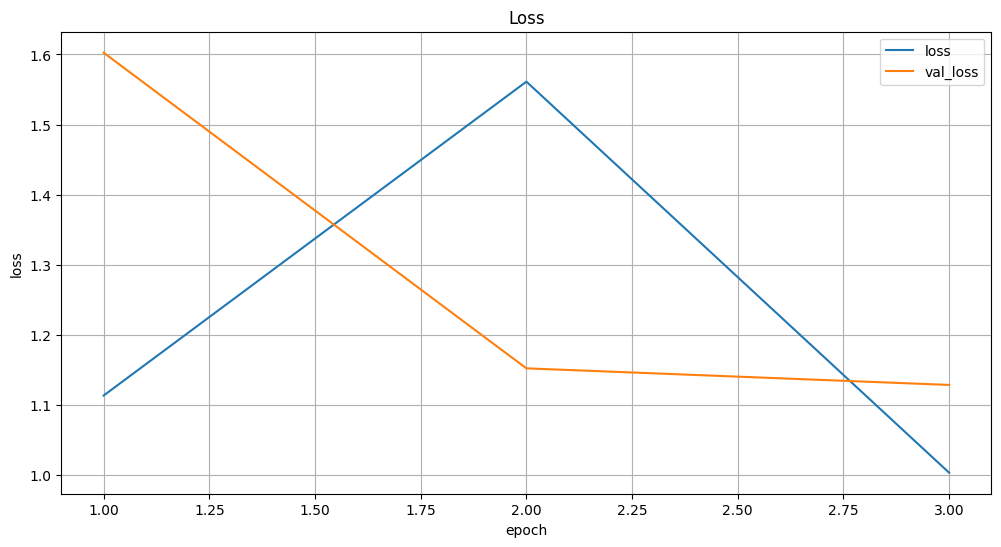

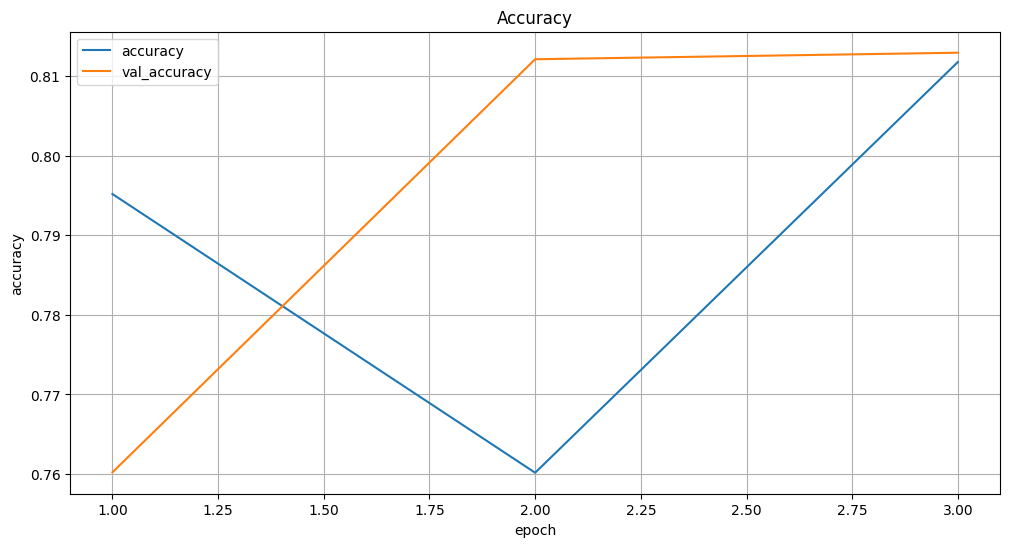

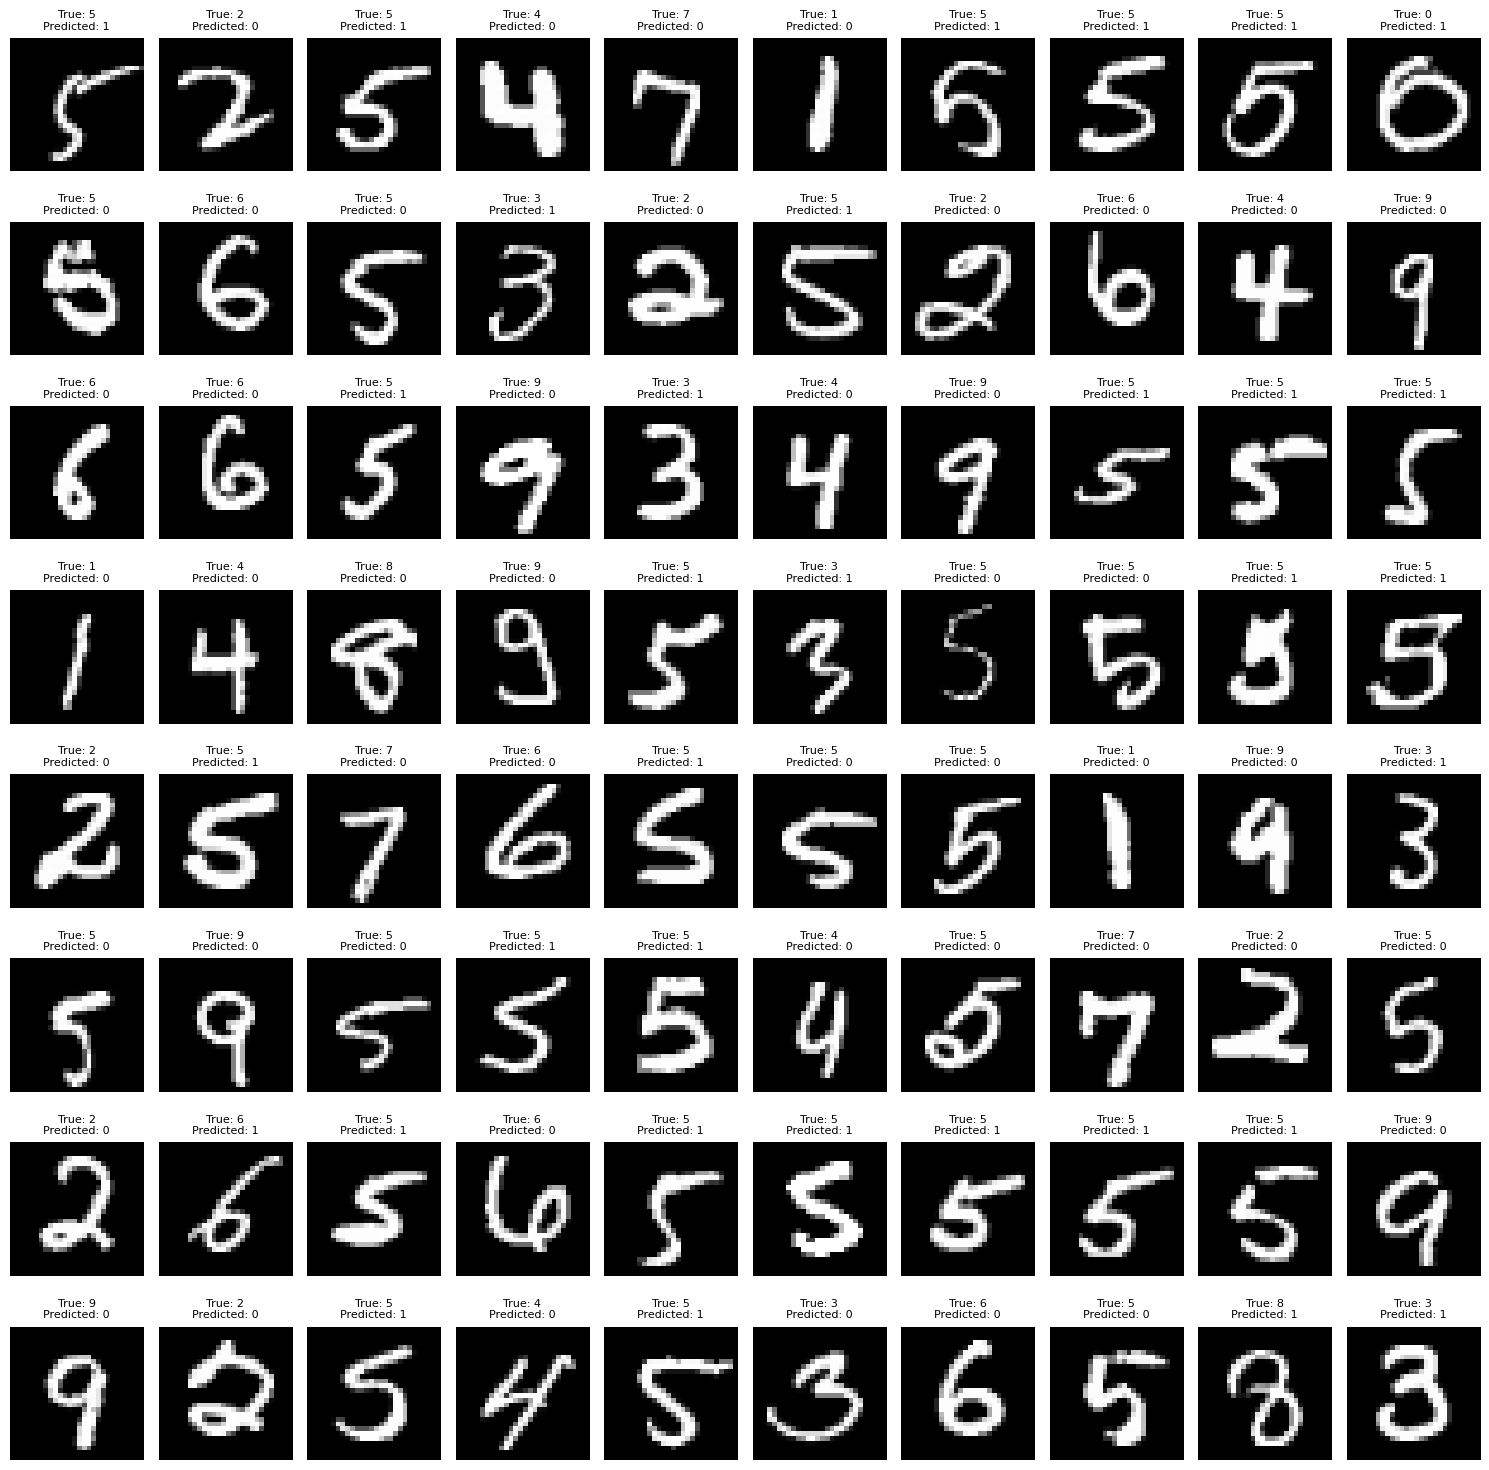

0.8434886499402628 0.7914798206278026 0.816657027183343 0.8035902851108765 0.8531390134529148 0.8276237085372484


In [71]:
# Evaluacion del modelo
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, \
precision_score, recall_score,f1_score

loss_train = history.history['loss']
loss_val = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1, len(loss_train) + 1)

# Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_train, label='accuracy')
plt.plot(epochs, accuracy_val, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()

# predicciones binarias
y_pred = (model.predict(x_test, verbose=0) >= 0.5).astype(int)[:, 0]

# Identifica indices de muestras mal clasificadas
indices_incorrectos = np.where(y_pred != y_test)[0]

# Mostramos los 80 ejemplos rancios
indices80 = indices_incorrectos[:80]

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices80):
    plt.subplot(8, 10, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {y_test[idx]}\nPredicted: {y_pred[idx]}', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Reportar accuracy, precisi ́on, recall y f1-score para ambas clases.
print(precision_score(y_test_binary, y_pred),
      recall_score(y_test_binary, y_pred),
      f1_score(y_test_binary, y_pred),
      precision_score(y_test_binary, y_pred, pos_label=0),
      recall_score(y_test_binary, y_pred, pos_label=0),
      f1_score(y_test_binary, y_pred, pos_label=0))